<a href="https://colab.research.google.com/github/paulokuriki/simple_diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Jupyter Notebook

## Jupyter notebook created for the Introduction to Machine Learning Course

### Paulo Kuriki - DasaInova

---

Based on SHRUTI_IYYER NB notebook

https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [ ]:
# installs the MLJAR library
!pip install mljar-supervised

In [2]:
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from supervised import AutoML

%matplotlib inline

In [5]:
# Downloads the diabetes dataset
_ = urllib.request.urlretrieve('https://raw.githubusercontent.com/paulokuriki/simple_diabetes/main/dataset.csv', "dataset.csv")

In [6]:
# Loading the dataset
df = pd.read_csv('dataset.csv')

# Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


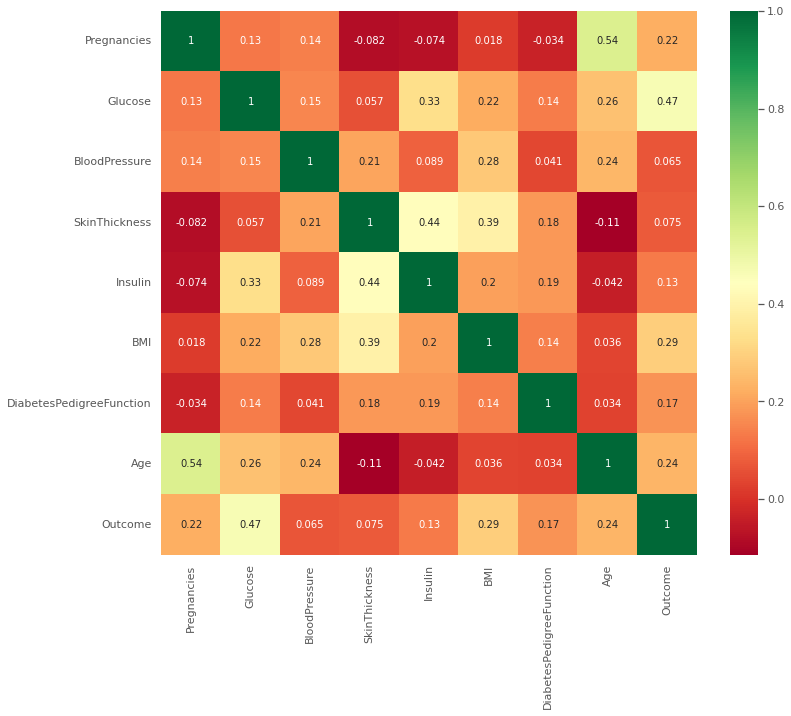

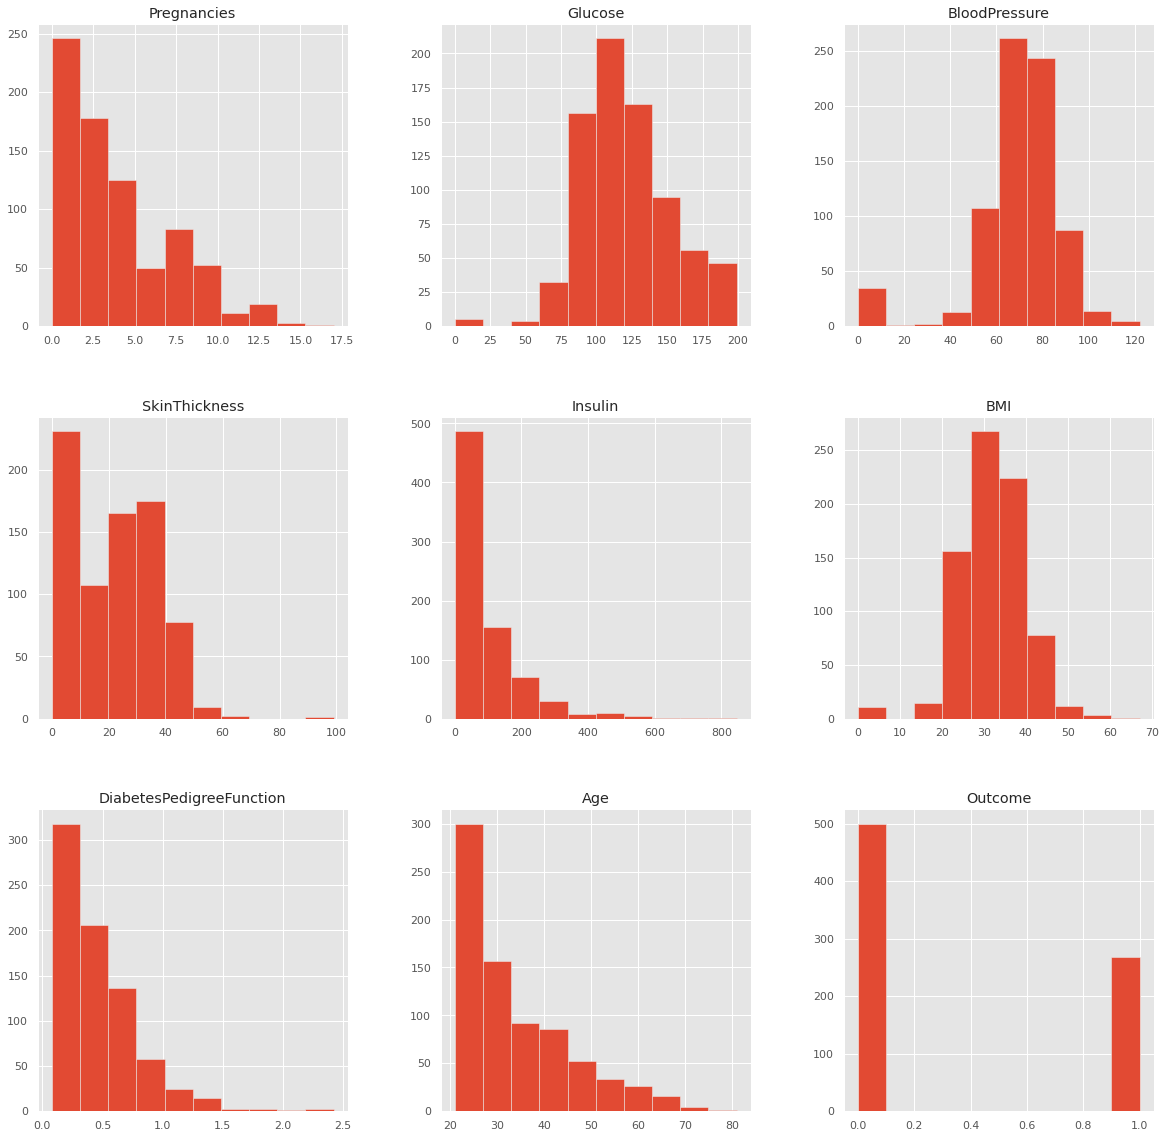

In [14]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
_ = sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')  # seaborn has very simple solution for heatmap
_ = df.hist(figsize = (20,20))

In [7]:
# Creates the X dataset without the label
X = df.drop(["Outcome"], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
# creates the label dataset
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
# trains some simple models
automl = AutoML(mode="Explain")
automl.fit(X, y)

AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.646799 trained in 0.4 seconds
2_DecisionTree logloss 0.792039 trained in 11.7 seconds
3_Linear logloss 0.472213 trained in 3.62 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.524482 trained in 6.51 seconds
5_Default_NeuralNetwork logloss 0.978159 trained in 1.4 seconds
6_Default_RandomForest logloss 0.466647 trained in 6.77 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.460017 trained in 0.76 seconds
AutoML fit time: 45.9 seconds
AutoML best model: Ensemble


AutoML()

#Check the results on the left panel inside Auto_ML_1 folder

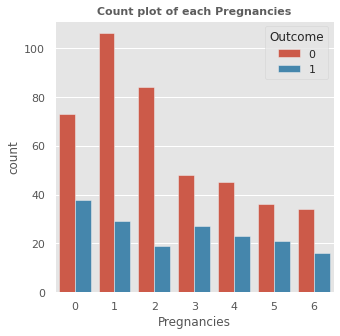

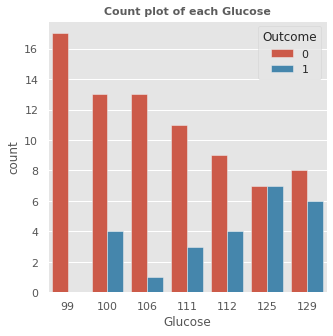

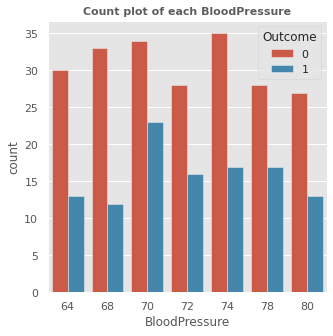

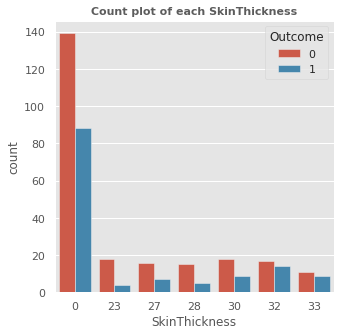

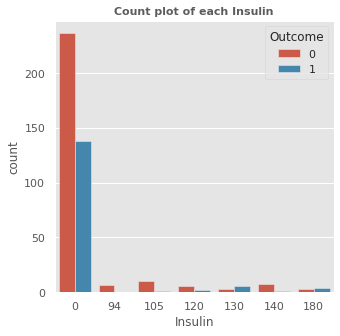

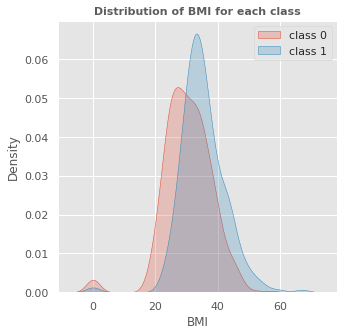

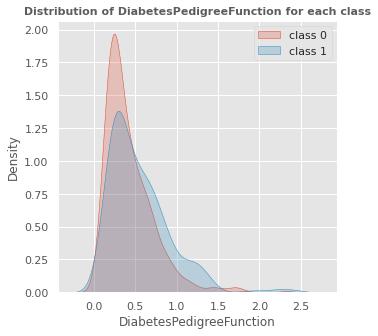

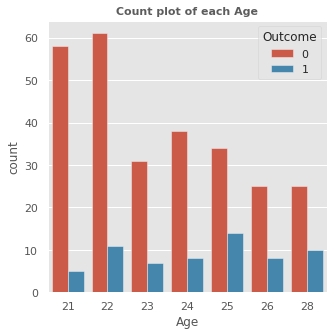

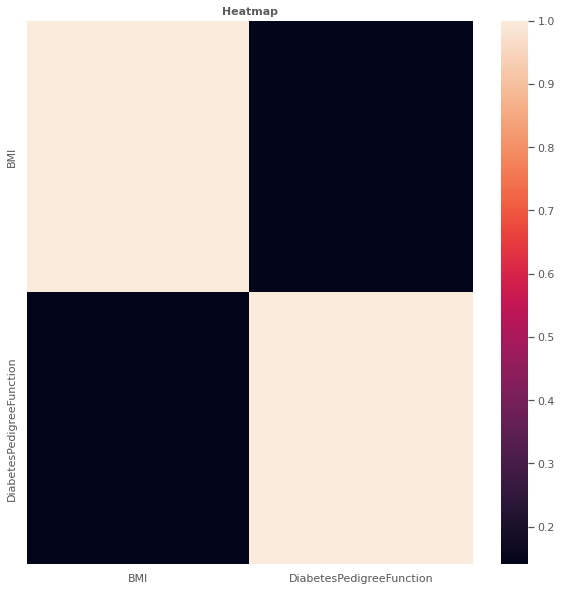

In [13]:
# Runs a exploratory data analysis
from supervised.preprocessing.eda import EDA
EDA.extensive_eda(X, y, save_path="/content/AutoML_1")